# Aggregations and plots for time-series data

Code modified from a Datacamp course

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and create the proper column for time series
flights = sns.load_dataset('flights')
flights['year'] = flights['year'].astype('str')
flights['month'] = flights['month'].astype('str')
flights['date'] = flights['month'] + ' ' + flights['year']


flights['date'] = pd.to_datetime(flights['date'])

# Set the index to be the date. This is important
flights = flights.set_index('date')
flights = flights[['passengers']]

flights.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


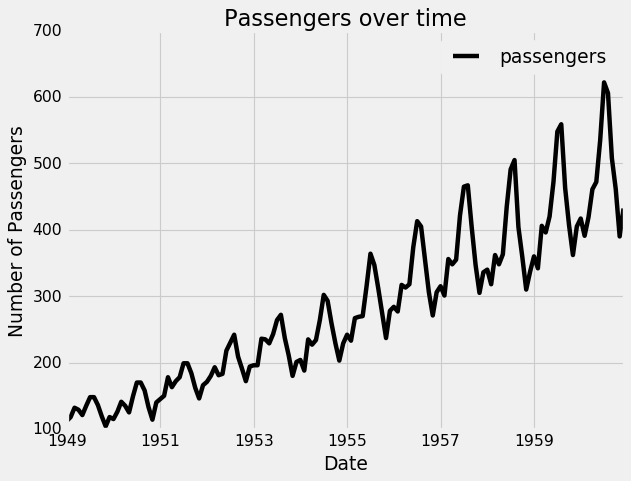

In [15]:
# Sets the style of your plot. Multiple options
plt.style.use('tableau-colorblind10')
ax = flights.plot(color='black')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Passengers')
ax.set_title("Passengers over time")
plt.show();

### Rolling Averages

In [5]:
flights_averages = flights.rolling(window=12).mean()

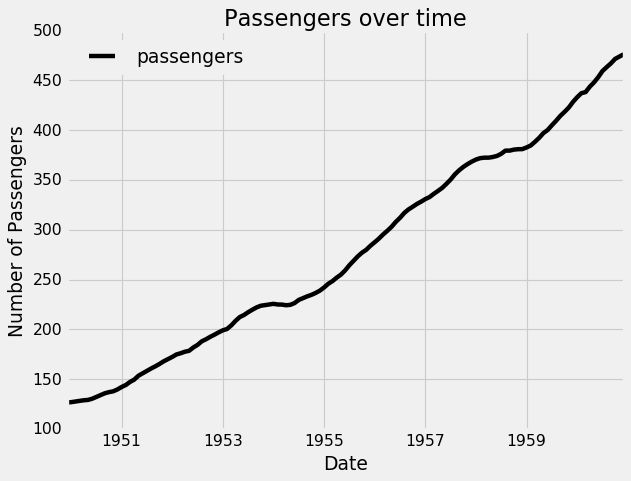

In [17]:
# Setting the flight plot to ax and adding basic modifications
ax = flights_averages.plot(color='black')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Passengers')
ax.set_title("Passengers over time")
plt.show();

If you want a moving average, using .rolling can be helpful. In this specific case with seasonality, it's not a very accurate plot

## Aggregating by Month

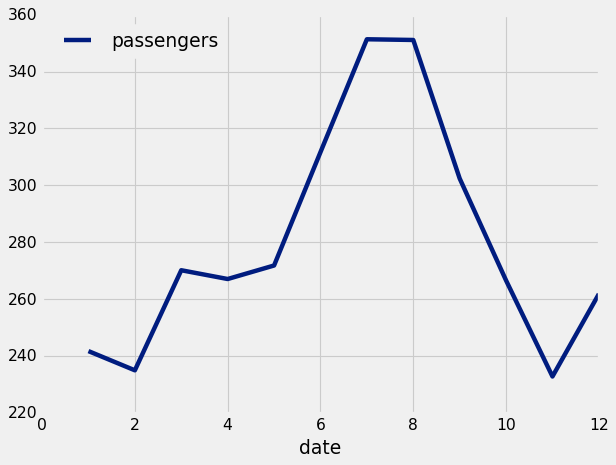

In [21]:
idx = flights.index.month
flights_idx = flights.groupby(idx).mean()
flights_idx.plot()
plt.show()

In [22]:
# flights.index.year
# flights.index.month
# flights.index.day

We can see that summer months tend to have higher passenger numbers. Aggregating by month shows us this seasonality. 

### Other quick plots

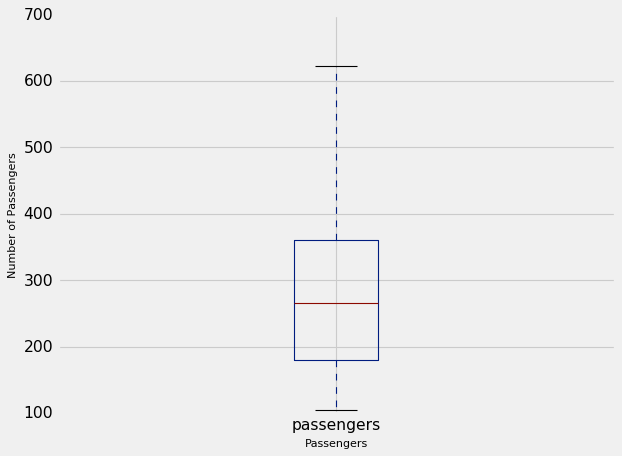

In [26]:
# Boxplot
ax = flights.boxplot()

ax.set_xlabel('Passengers', fontsize=10)
ax.set_ylabel('Number of Passengers', fontsize=10)
plt.show()

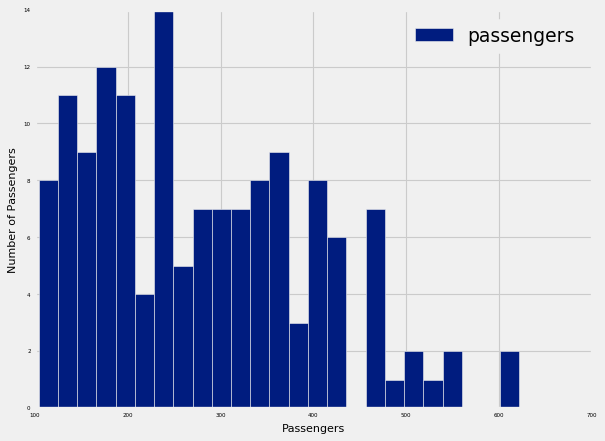

In [30]:
# Histogram
ax = flights.plot(kind='hist', bins=25, fontsize=5)

ax.set_xlabel('Passengers', fontsize=10)
ax.set_ylabel('Number of Passengers', fontsize=10)
plt.show()

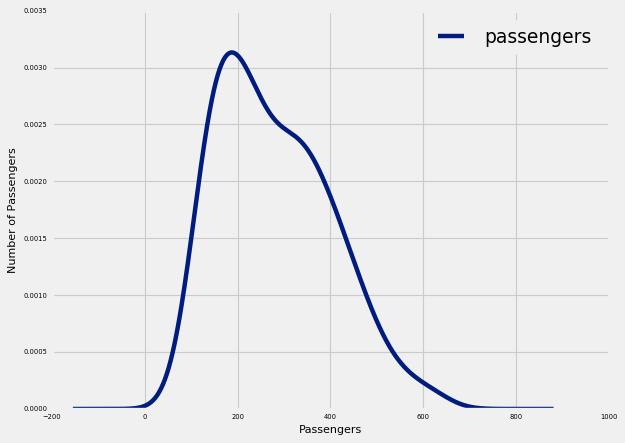

In [32]:
# Density Plot
# Better to use density to show distribution because histogram is unstable with the number of bins
ax = flights.plot(kind='density', linewidth=4, fontsize=6)

ax.set_xlabel('Passengers', fontsize=10)
ax.set_ylabel('Number of Passengers', fontsize=10)
plt.show()